In [2]:
import pandas as pd
import seaborn as sns
import inventorize3 as inv
from datetime import date, timedelta

In [3]:
df = pd.read_csv('uk_ireland_data.csv')
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,date,revenue,year,month
0,489434.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00Z,6.95,13085.0,UKUK,2009-12-01,83.4,2009,Dec
1,489434.0,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00Z,6.75,13085.0,UKUK,2009-12-01,81.0,2009,Dec
2,489434.0,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00Z,6.75,13085.0,UKUK,2009-12-01,81.0,2009,Dec


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944148 entries, 0 to 944147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      944146 non-null  float64
 1   StockCode    944148 non-null  object 
 2   Description  944148 non-null  object 
 3   Quantity     944148 non-null  int64  
 4   InvoiceDate  944148 non-null  object 
 5   Price        944148 non-null  float64
 6   Customer.ID  715999 non-null  float64
 7   Country      944148 non-null  object 
 8   date         944148 non-null  object 
 9   revenue      944148 non-null  float64
 10  year         944148 non-null  int64  
 11  month        944148 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
max_date = max(df['date'])
max_date

Timestamp('2011-12-09 00:00:00')

In [7]:
max_date - timedelta(days = 90)

Timestamp('2011-09-10 00:00:00')

In [8]:
df_90days = df[df['date'] >= max_date - timedelta(days = 90)]

In [9]:
df_90days = df_90days.groupby(by = ['Description', 'date']).agg(sum_daily_qty = ('Quantity', 'sum'), sum_daily_revenue = ('revenue', 'sum')).reset_index()
df_90days

,Description,date,sum_daily_qty,sum_daily_revenue
0,10 COLOUR SPACEBOY PEN,2011-09-11,1,0.85
1,10 COLOUR SPACEBOY PEN,2011-09-13,36,30.60
2,10 COLOUR SPACEBOY PEN,2011-09-19,48,40.80
3,10 COLOUR SPACEBOY PEN,2011-09-21,5,8.15
4,10 COLOUR SPACEBOY PEN,2011-09-22,24,20.40
...,...,...,...,...
89030,website fixed,2011-09-19,110,0.00
89031,wrongly coded 20713,2011-10-06,800,0.00
89032,wrongly coded 23343,2011-10-27,1000,0.00
89033,wrongly marked,2011-10-31,48,0.00


In [10]:
df_90days = df_90days.groupby(by = ['Description']).agg(average_daily_qty = ('sum_daily_qty', 'mean'),
                                                       std_daily_qty = ('sum_daily_qty', 'std'),
                                                       sum_daily_qty = ('sum_daily_qty', 'sum'),
                                                       sum_daily_revenue = ('sum_daily_revenue', 'sum')).reset_index()

In [11]:
df_90days

,Description,average_daily_qty,std_daily_qty,sum_daily_qty,sum_daily_revenue
0,10 COLOUR SPACEBOY PEN,29.775862,27.212641,1727,1524.36
1,12 COLOURED PARTY BALLOONS,16.416667,13.813813,591,386.53
2,12 DAISY PEGS IN WOOD BOX,1.428571,0.534522,10,16.50
3,12 EGG HOUSE PAINTED WOOD,2.125000,1.727338,51,770.16
4,12 HANGING EGGS HAND PAINTED,6.666667,3.669696,40,83.20
...,...,...,...,...,...
3268,website fixed,110.000000,NaN,110,0.00
3269,wrongly coded 20713,800.000000,NaN,800,0.00
3270,wrongly coded 23343,1000.000000,NaN,1000,0.00
3271,wrongly marked,48.000000,NaN,48,0.00


In [12]:
abc_analysis = inv.productmix(skus = df_90days['Description'], sales = df_90days['sum_daily_qty'], revenue = df_90days['sum_daily_revenue']).reset_index()

In [13]:
service_level_mapping = {'A_A':0.8, 'A_B':0.7, 'A_C':0.7, 'B_A':0.8, 'B_B':0.7, 'B_C':0.6, 'C_A':0.8, 'C_B':0.6, 'C_C':0.6}

In [14]:
abc_analysis['service_level'] = abc_analysis['product_mix'].map(service_level_mapping)
abc_analysis.head()

,index,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
0,852,DOTCOM POSTAGE,138,85834.48,0.000077,0.967091,0.024845,0.024845,C,A,C_A,0.8
1,1909,PAPER CHAIN KIT 50'S CHRISTMAS,14910,50161.94,0.008327,0.032260,0.014520,0.039365,A,A,A_A,0.8
2,2161,RABBIT NIGHT LIGHT,13108,33513.43,0.007320,0.047728,0.009701,0.049065,A,A,A_A,0.8
3,2262,REGENCY CAKESTAND 3 TIER,2440,31897.95,0.001363,0.393536,0.009233,0.058298,A,A,A_A,0.8
4,1429,JUMBO BAG RED RETROSPOT,14589,28760.92,0.008148,0.040407,0.008325,0.066623,A,A,A_A,0.8


In [15]:
reorderpoint_df = pd.merge(left = df_90days, right = abc_analysis[['skus', 'service_level']], 
         how = 'inner', left_on = 'Description', right_on = 'skus')

In [16]:
reorderpoint_df

,Description,average_daily_qty,std_daily_qty,sum_daily_qty,sum_daily_revenue,skus,service_level
0,10 COLOUR SPACEBOY PEN,29.775862,27.212641,1727,1524.36,10 COLOUR SPACEBOY PEN,0.8
1,12 COLOURED PARTY BALLOONS,16.416667,13.813813,591,386.53,12 COLOURED PARTY BALLOONS,0.7
2,12 DAISY PEGS IN WOOD BOX,1.428571,0.534522,10,16.50,12 DAISY PEGS IN WOOD BOX,0.6
3,12 EGG HOUSE PAINTED WOOD,2.125000,1.727338,51,770.16,12 EGG HOUSE PAINTED WOOD,0.6
4,12 HANGING EGGS HAND PAINTED,6.666667,3.669696,40,83.20,12 HANGING EGGS HAND PAINTED,0.6
...,...,...,...,...,...,...,...
3268,website fixed,110.000000,NaN,110,0.00,website fixed,0.6
3269,wrongly coded 20713,800.000000,NaN,800,0.00,wrongly coded 20713,0.7
3270,wrongly coded 23343,1000.000000,NaN,1000,0.00,wrongly coded 23343,0.7
3271,wrongly marked,48.000000,NaN,48,0.00,wrongly marked,0.6


In [17]:
empty_df = pd.DataFrame()
for i in range(reorderpoint_df.shape[0]):
    reorder_point = inv.reorderpoint_leadtime_variability(dailydemand = int(reorderpoint_df['average_daily_qty'][i]), 
                                                          dailystandarddeviation = reorderpoint_df['std_daily_qty'][i],
                                                          leadtimein_days = 21, 
                                                          sd_leadtime_days = 2,
                                                          csl = reorderpoint_df['service_level'][i])
    as_data = pd.DataFrame(reorder_point, index = [0]) 
    as_data['Description'] = reorderpoint_df['Description'][i]
    empty_df = pd.concat([empty_df, as_data], axis = 0)

In [18]:
empty_df

,demandleadtime,sigmadl,safteyfactor,reorder_point,Description
0,609,131.267225,0.841621,719.477284,10 COLOUR SPACEBOY PEN
0,336,67.240241,0.524401,371.260817,12 COLOURED PARTY BALLOONS
0,21,2.449490,0.253347,21.620571,12 DAISY PEGS IN WOOD BOX
0,42,8.523943,0.253347,44.159516,12 EGG HOUSE PAINTED WOOD
0,126,18.889150,0.253347,130.785512,12 HANGING EGGS HAND PAINTED
...,...,...,...,...,...
0,2310,NaN,0.253347,NaN,website fixed
0,16800,NaN,0.524401,NaN,wrongly coded 20713
0,21000,NaN,0.524401,NaN,wrongly coded 23343
0,1008,NaN,0.253347,NaN,wrongly marked


In [19]:
merged_df = pd.merge(reorderpoint_df, empty_df, how = 'inner', on = 'Description')
merged_df['safety_stock'] = merged_df['reorder_point'] - merged_df['demandleadtime']
merged_df.head(3)

,Description,average_daily_qty,std_daily_qty,sum_daily_qty,sum_daily_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,safety_stock
0,10 COLOUR SPACEBOY PEN,29.775862,27.212641,1727,1524.36,10 COLOUR SPACEBOY PEN,0.8,609,131.267225,0.841621,719.477284,110.477284
1,12 COLOURED PARTY BALLOONS,16.416667,13.813813,591,386.53,12 COLOURED PARTY BALLOONS,0.7,336,67.240241,0.524401,371.260817,35.260817
2,12 DAISY PEGS IN WOOD BOX,1.428571,0.534522,10,16.50,12 DAISY PEGS IN WOOD BOX,0.6,21,2.449490,0.253347,21.620571,0.620571


<Axes: xlabel='std_daily_qty', ylabel='safety_stock'>

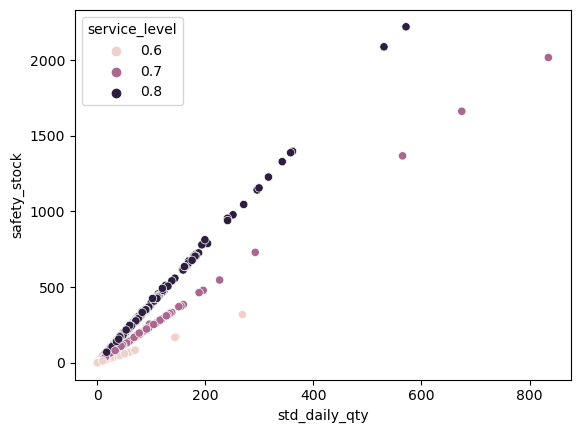

In [20]:
sns.scatterplot(data = merged_df[merged_df['safety_stock'] != max(merged_df['safety_stock'])], x = 'std_daily_qty', y = 'safety_stock', hue = 'service_level')